In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Input
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [3]:
train_images = train_images.astype('float32') / 255.0
test_images =test_images.astype('float32') / 255.0

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

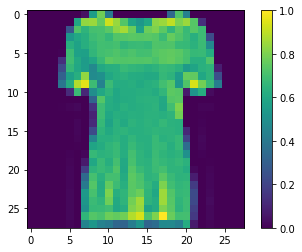

In [5]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

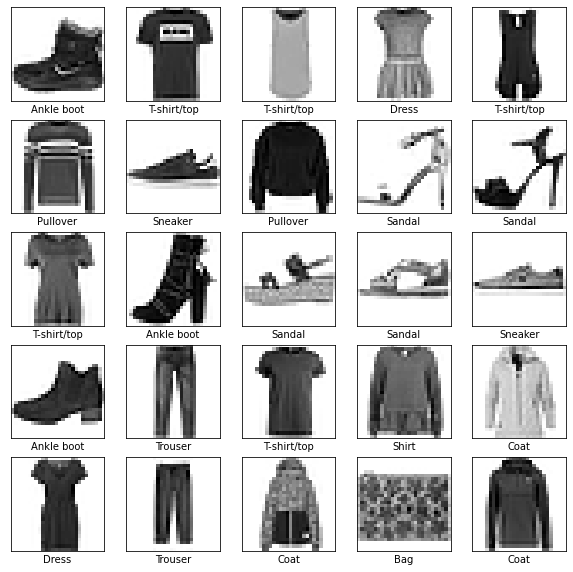

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [7]:
val_images, train_images= train_images[:3000], train_images[3000:] 
val_labels, train_labels = train_labels[:3000], train_labels[3000:]

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
     tf.keras.layers.Dropout(0.2),
       tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
history = model.fit(train_images
                    ,train_labels
                    ,epochs=10
                    ,batch_size=512
                    ,validation_data=(val_images,val_labels)
                                                                                                                              
                   )

Epoch 1/10
112/112 [==============================] - 4s 7ms/step - loss: 1.4944 - accuracy: 0.4657 - val_loss: 0.5545 - val_accuracy: 0.8190
Epoch 2/10
112/112 [==============================] - 0s 4ms/step - loss: 0.6472 - accuracy: 0.7811 - val_loss: 0.4449 - val_accuracy: 0.8433
Epoch 3/10
112/112 [==============================] - 0s 3ms/step - loss: 0.5244 - accuracy: 0.8208 - val_loss: 0.4074 - val_accuracy: 0.8550
Epoch 4/10
112/112 [==============================] - 0s 4ms/step - loss: 0.4700 - accuracy: 0.8371 - val_loss: 0.3891 - val_accuracy: 0.8683
Epoch 5/10
112/112 [==============================] - 0s 3ms/step - loss: 0.4434 - accuracy: 0.8460 - val_loss: 0.3732 - val_accuracy: 0.8697
Epoch 6/10
112/112 [==============================] - 0s 4ms/step - loss: 0.4114 - accuracy: 0.8552 - val_loss: 0.3689 - val_accuracy: 0.8700
Epoch 7/10
112/112 [==============================] - 0s 3ms/step - loss: 0.3980 - accuracy: 0.8578 - val_loss: 0.3670 - val_accuracy: 0.8677
Epoch 

In [11]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3551 - accuracy: 0.8717

Test accuracy: 0.8716999888420105


In [12]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [13]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

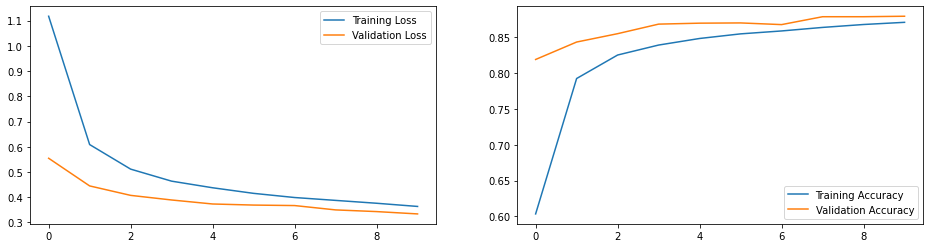

In [14]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

In [15]:
val_loss, val_acc = model.evaluate(test_images, test_labels)
print(val_loss)
print(val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3551 - accuracy: 0.8717
0.355121910572052
0.8716999888420105


In [16]:
predictions = model.predict(test_images)

In [17]:
print(predictions)

[[ -5.7928424  -4.1425962  -3.487478  ...   3.1606529  -4.8297744
    5.8924985]
 [ -1.6687922  -4.4395547   6.4560795 ...  -9.731214   -3.8169947
   -8.6249075]
 [ -2.9221435  19.434326   -6.317756  ... -10.421024  -13.117478
  -10.97097  ]
 ...
 [ -1.0722188  -6.1589804  -1.0941879 ...  -1.7312934   8.106206
   -4.6140876]
 [ -3.5676699  15.694708   -6.577904  ...  -7.1996922 -11.51148
   -8.582207 ]
 [ -3.1699808  -5.628915   -3.6381903 ...   2.1329157  -1.8246474
   -0.8695774]]


In [18]:
import numpy as np

print(np.argmax(predictions[0]))

9


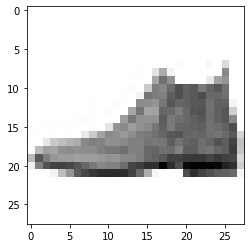

In [19]:
plt.imshow(test_images[0],cmap=plt.cm.binary)
plt.show()

In [20]:
pred_classes = np.argmax(model.predict(train_images), axis=-1)
pred_classes

array([6, 3, 2, ..., 3, 0, 5])

In [21]:
conf_mx = tf.math.confusion_matrix(train_labels, pred_classes)
conf_mx

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[5107,    2,   64,  115,   10,    1,  394,    0,   25,    0],
       [  14, 5558,    4,   86,    4,    0,    9,    1,    1,    2],
       [  58,    3, 4521,   52,  696,    0,  358,    0,   22,    0],
       [ 269,   30,   19, 5103,  160,    0,   95,    0,   12,    0],
       [   7,    8,  346,  187, 4828,    0,  303,    0,   18,    0],
       [   0,    0,    0,    0,    0, 5530,    1,  133,    8,   28],
       [ 962,    4,  433,  111,  436,    0, 3705,    0,   51,    0],
       [   0,    0,    0,    0,    0,   56,    0, 5484,    9,  139],
       [  16,    1,   16,   12,   17,    1,   38,   12, 5599,    1],
       [   0,    1,    0,    0,    0,   32,    0,  173,    2, 5497]],
      dtype=int32)>

In [22]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

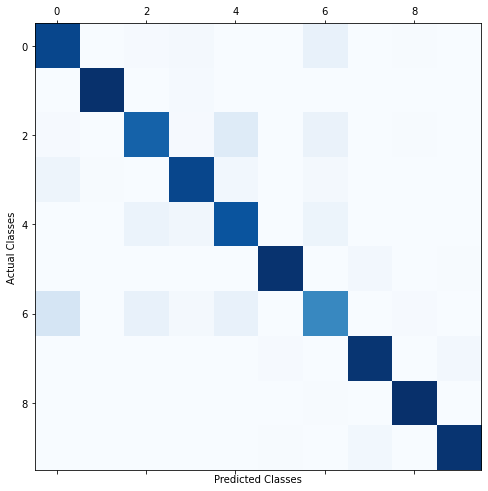

In [23]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx, cmap=plt.cm.Blues,  fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()